In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math as math

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('accel_1301201579.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'accel_1301201579.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [ ]:
df1.head(10)

,Time,x,y,z,Absolute
0,-0.001941,-0.184135,0.006737,-0.045949,0.189901
1,0.008087,-0.068834,-0.011209,0.054018,0.088214
2,0.018115,0.074714,-0.036590,-0.017231,0.084958
3,0.028143,0.234895,-0.053797,0.071401,0.251332
4,0.038171,0.345891,-0.039226,0.084889,0.358309
5,0.048199,0.382050,-0.003846,0.085487,0.391516
6,0.058227,0.437192,0.021035,0.127689,0.455943
7,0.068255,0.416167,0.025613,0.123215,0.434779
8,0.078283,0.367098,-0.041012,0.124226,0.389712
9,0.088311,0.385418,-0.108129,0.116010,0.416770


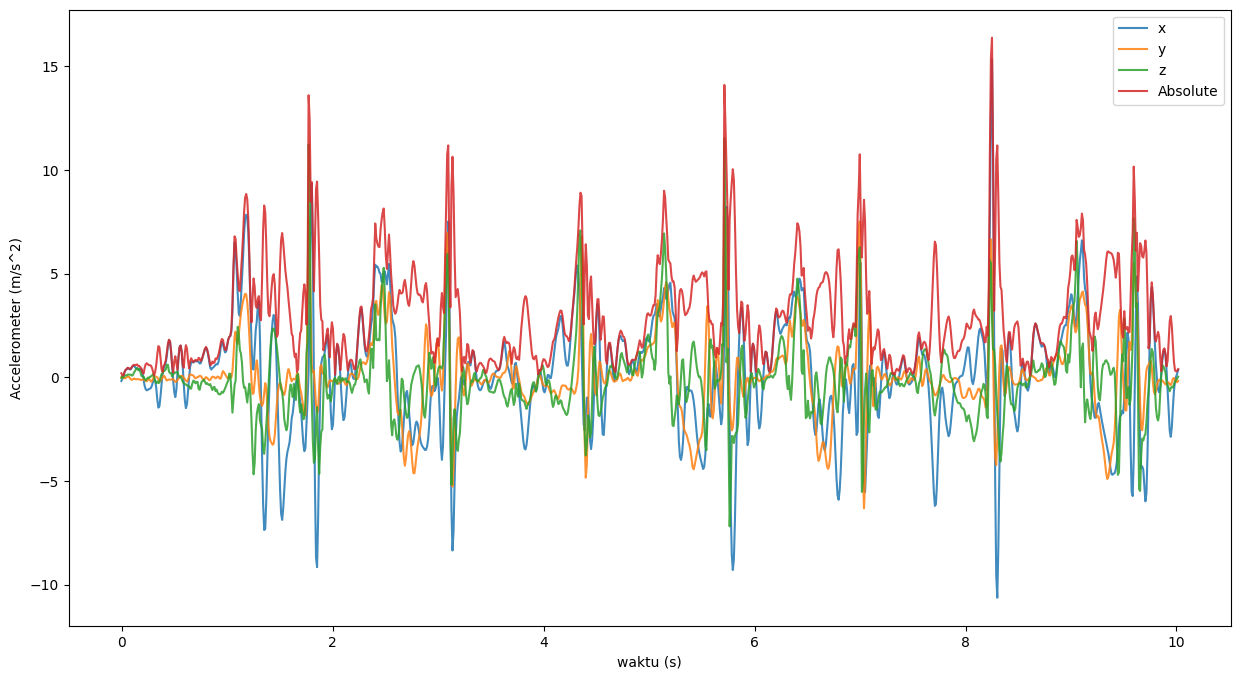

In [ ]:
df1.plot(x='Time', figsize=(15, 8), alpha=0.85)
plt.xlabel("waktu (s)")
plt.ylabel("Accelerometer (m/s^2)")
plt.show()

<ipython-input-3-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


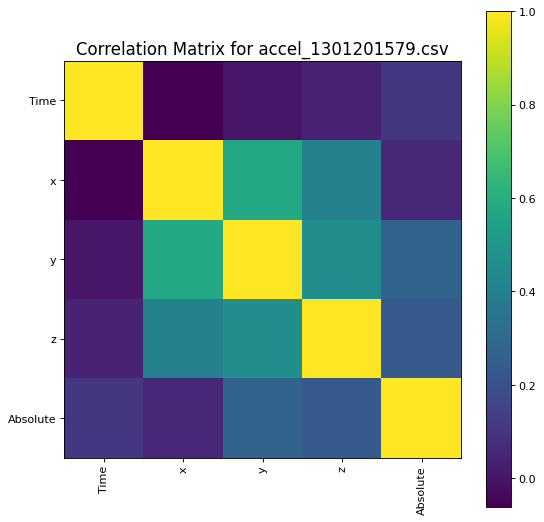

In [ ]:
plotCorrelationMatrix(df1, 8)

<ipython-input-4-d6f0f127ac9b>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


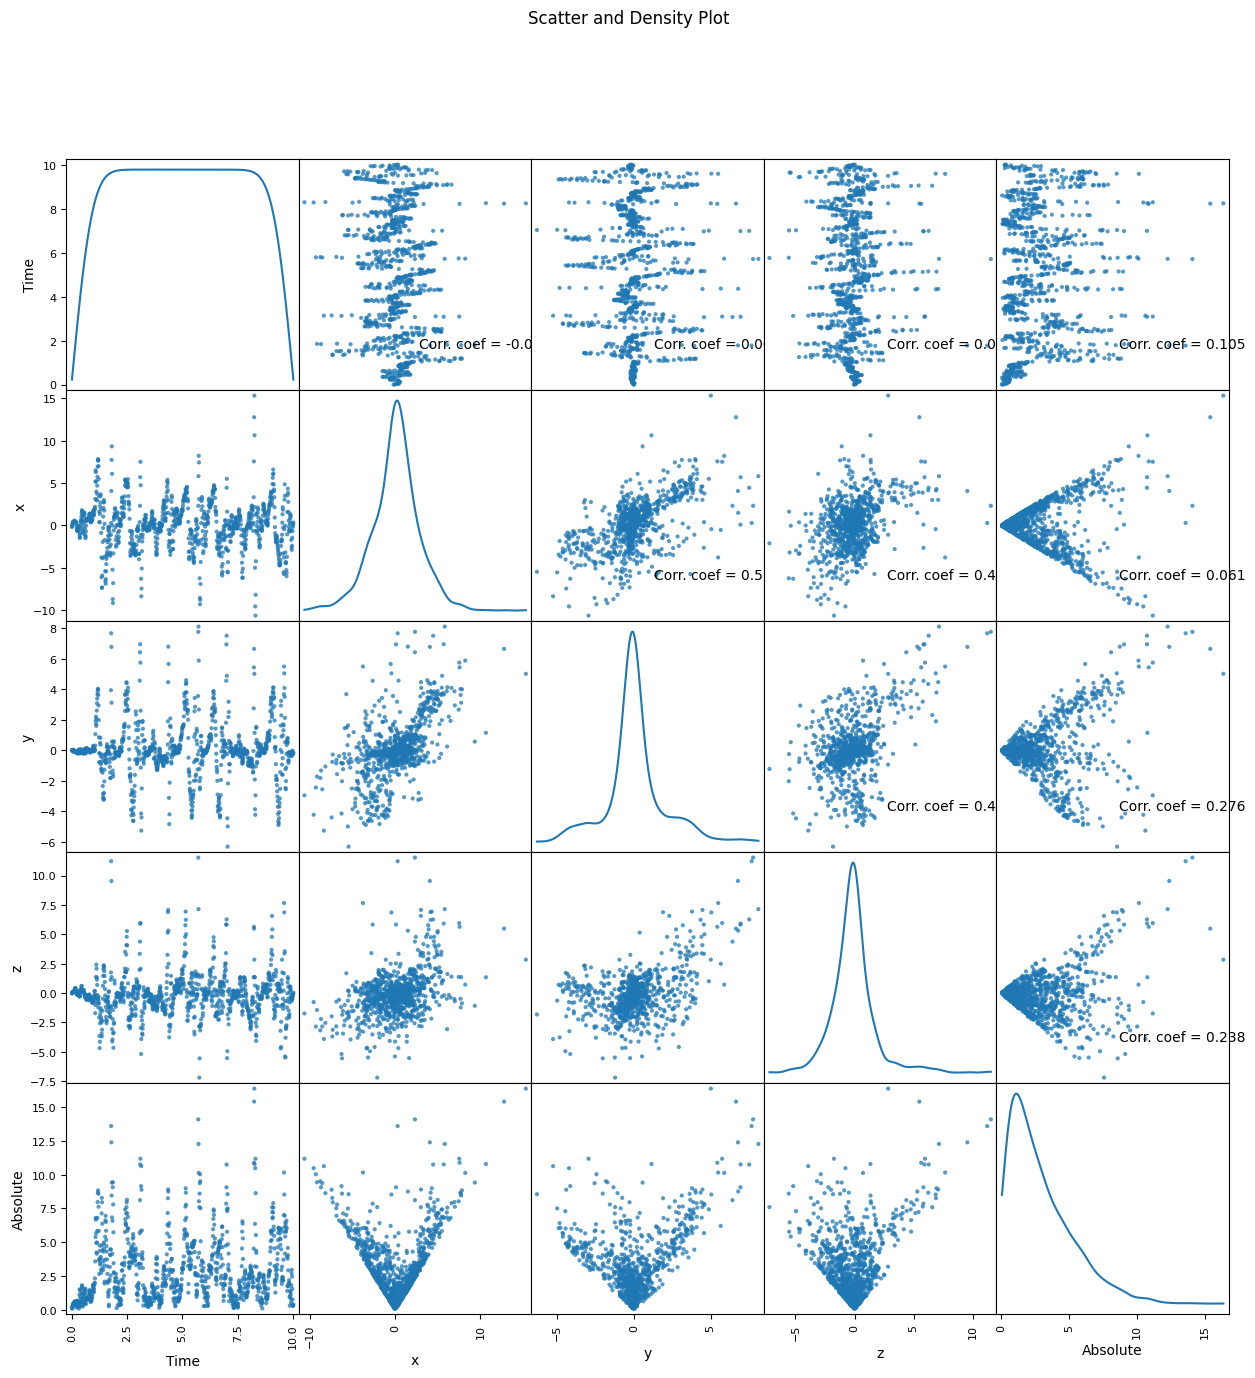

In [ ]:
plotScatterMatrix(df1, 15, 10)

In [ ]:
sudutRho = np.arctan(df1['x']/np.sqrt(df1['y']**2 + df1['z']**2))

In [ ]:
sudutFi = np.arctan(df1['y']/np.sqrt(df1['x']**2 + df1['z']**2))

In [ ]:
sudutTheta = np.arctan(np.sqrt(df1['x']**2 + df1['y']**2)/df1['z'])

In [ ]:
sudutRho

0     -1.323739
1     -0.895152
2      1.074642
3      1.207132
4      1.306752
         ...   
995   -1.088602
996   -0.674793
997    0.085727
998    0.589540
999    1.099914
Length: 1000, dtype: float64

In [ ]:
sudutFi

0      0.035482
1     -0.127412
2     -0.445250
3     -0.215715
4     -0.109695
         ...   
995   -0.049096
996   -0.464081
997   -1.006191
998   -0.926423
999   -0.465060
Length: 1000, dtype: float64

In [ ]:
sudutTheta

0     -1.326406
1      0.911759
2     -1.366567
3      1.282738
4      1.331605
         ...   
995   -1.091539
996   -0.876544
997   -1.014332
998   -1.341357
999    1.502271
Length: 1000, dtype: float64

In [ ]:
waktu = df1['Time']

In [ ]:
sudut = {'Time' : waktu, 'Sudut Rho' : sudutRho, 'Sudut Fi' : sudutFi, 'Sudut Theta' : sudutTheta}
df_sudut = pd.DataFrame(sudut)

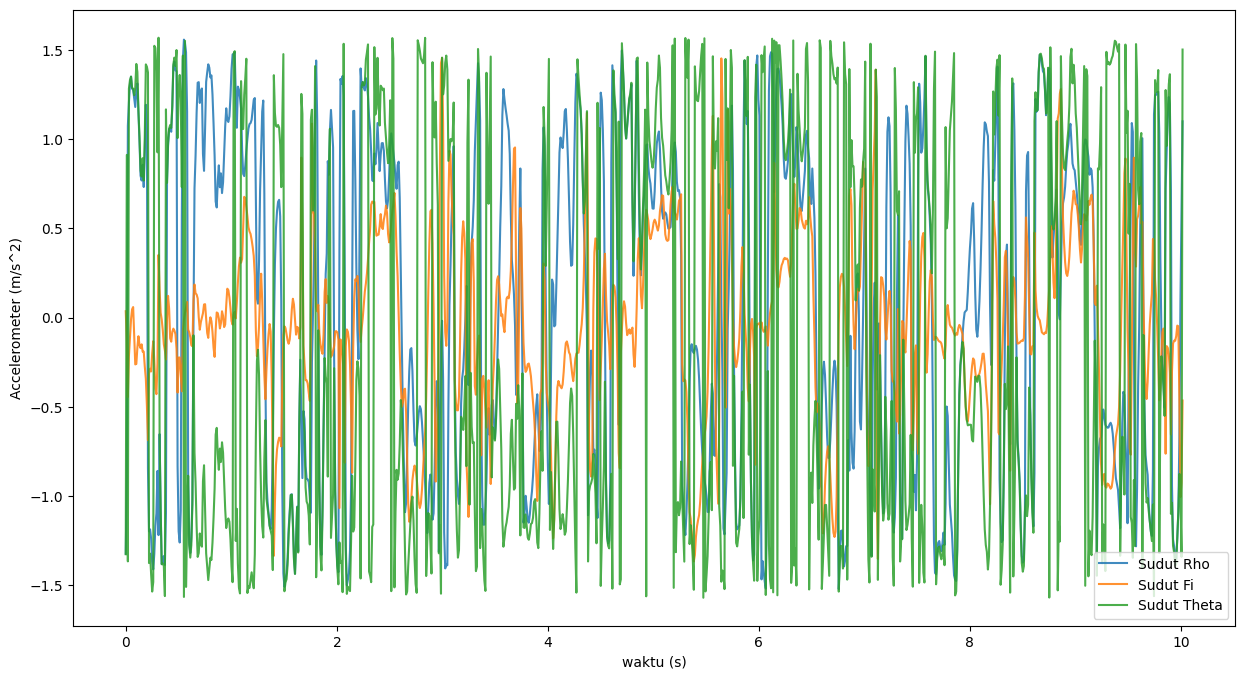

In [ ]:
df_sudut.plot(x='Time', figsize=(15, 8), alpha=0.85)
plt.xlabel("waktu (s)")
plt.ylabel("Accelerometer (m/s^2)")
plt.show()